## this project aims to predict house sale_prices 

***a describtion for the data features***
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
train = pd.read_csv('train.csv',na_values=[' ','N\A','?','xx','NA','!'])
test  = pd.read_csv('test.csv',na_values=[' ','N\A','?','xx','NA','!'])

## exploring the data 

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
## our target is SalePrice
# Dropping rows where the target is missing
Target = 'SalePrice'
train.dropna(axis=0, subset=[Target], inplace=True)

***let's discover our  target :)***

In [8]:
train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

all the data looks good so i think no need for alot of data adjusting if needed

***the next section is visualizing the target data and some features that might affect it***

<AxesSubplot:xlabel='SalePrice'>

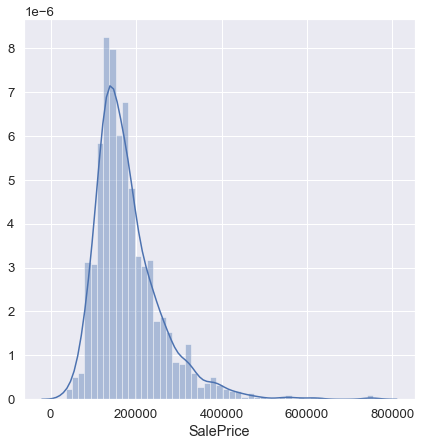

In [9]:
sns.distplot(train['SalePrice'])


it's clear that most of the prices r btwn few thousands and 400k ,so what after this is an outliar ? will see :)

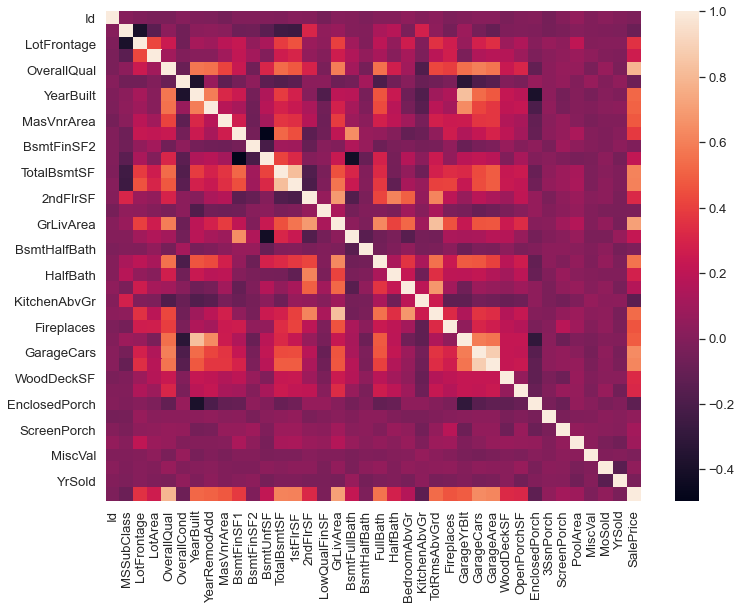

In [10]:
Correlation_Matrix = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(Correlation_Matrix)
plt.show()

it's clear that only few features affects the saleprice , let's check some out 

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

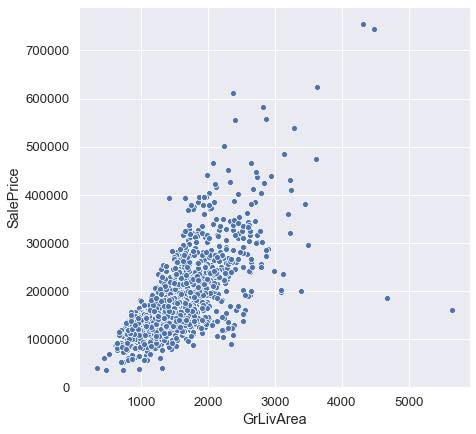

In [11]:
sns.scatterplot(data=train, x="GrLivArea", y="SalePrice")


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

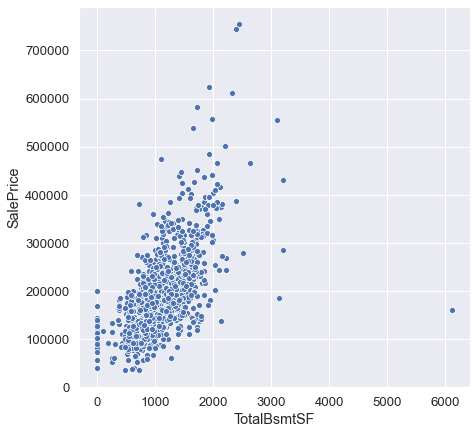

In [12]:
sns.scatterplot(data=train, x="TotalBsmtSF", y="SalePrice")


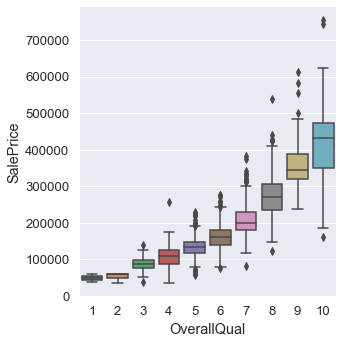

In [13]:
sns.catplot(x='OverallQual',y='SalePrice',data=train,kind='box')

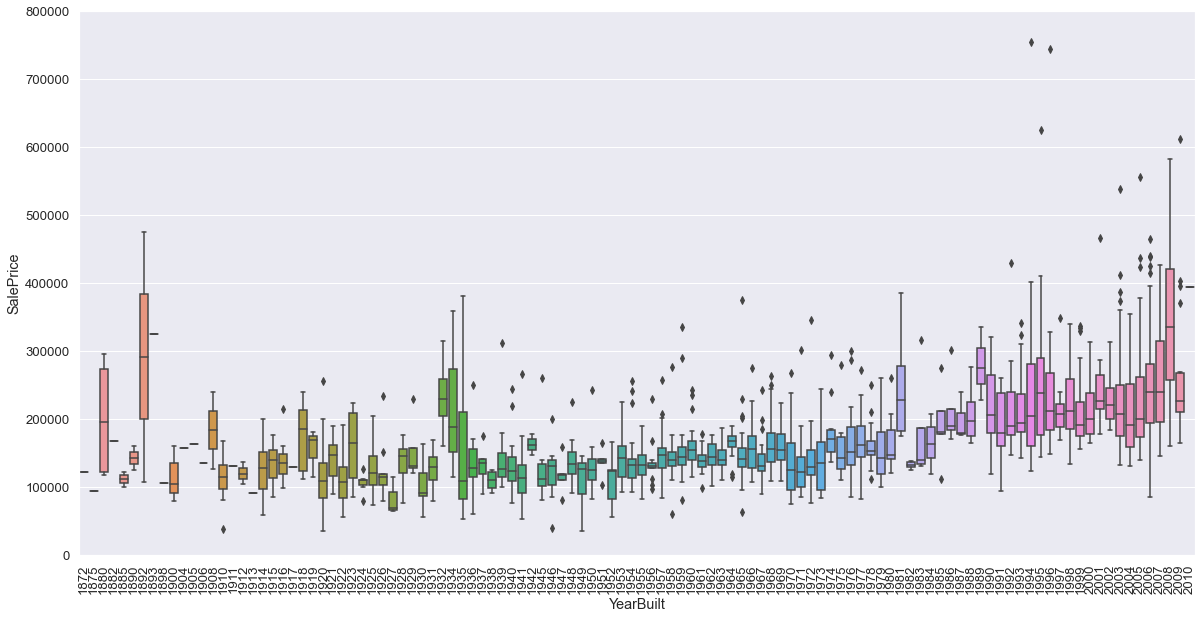

In [14]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

after all of this the yearbuilt wont help us at all ,how on earth a building from latest century is almost the same as  a new one ,so i  'll  ignore it

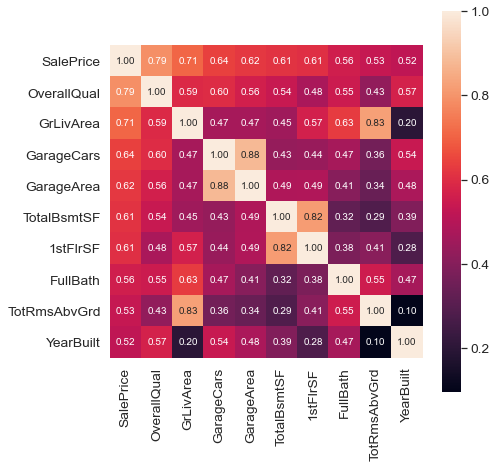

In [15]:
### i wanted to choose the best 10 features but couldn't :( sorry islam i alwayse forget xd , so i asked god of info :)
cols = Correlation_Matrix.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

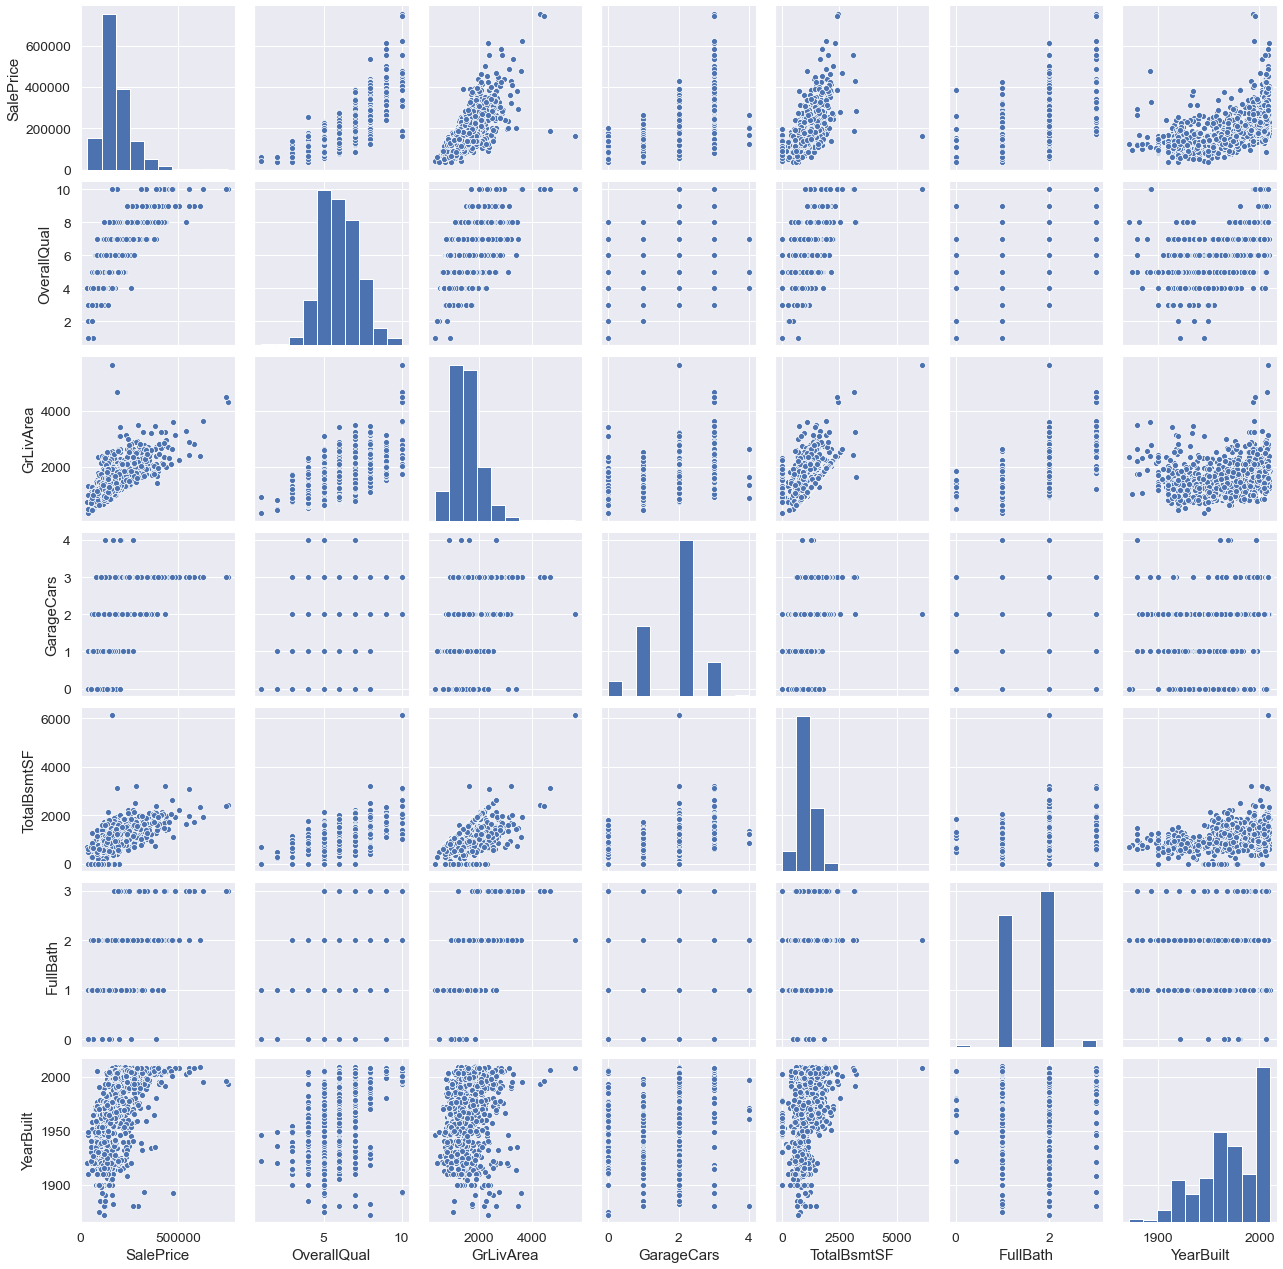

In [16]:
### now let's see the relation between these features and the target 
features=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[features],height = 2.5)
plt.show()


as for 1stFloor and GarageArea they simply like a repeating data so i ommited 'em 

In [17]:
# Looking for Missing Values
train[features].isna().sum()

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
dtype: int64

well the most strong features are very good , looks promising till now . let's check other data

In [18]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


## the comming section is for data handling :)


In [19]:
# Combine Test and Training sets to maintain consistancy : 
data=pd.concat([train.iloc[:,:-1],test],axis=0)
print('train df has {} rows and {} features'.format(train.shape[0],train.shape[1]))
print('test df has {} rows and {} features'.format(test.shape[0],test.shape[1]))
print('Combined df has {} rows and {} features'.format(data.shape[0],data.shape[1]))

# Dropping unwanted columns
data = data.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)
#data=data.drop(columns=['Id'],axis=1) ---> in case dropping only the id col we get down in the model high error and low score 
# Missing Value Handling : 
def HandleMissingValues(df):
    # for Object columns fill using 'UNKOWN'
    # for Numeric columns fill using median
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'UNKOWN'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values,inplace=True)
HandleMissingValues(data)
data.head()

train df has 1460 rows and 81 features
test df has 1459 rows and 80 features
Combined df has 2919 rows and 80 features


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [20]:
data.isnull().sum().max()
### good there is no missing data

0

In [21]:
#Categorical Feature Encoding

def getObjectColumnsList(df):
    return [cname for cname in df.columns if df[cname].dtype == "object"]

def PerformOneHotEncoding(df,columnsToEncode):
    return pd.get_dummies(df,columns = columnsToEncode)

cat_cols = getObjectColumnsList(data)
data = PerformOneHotEncoding(data,cat_cols)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_UNKOWN,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
data.shape

(2919, 288)

In [23]:
#spliting the data into train and test datasets
train_data=data.iloc[:1460,:]
test_data=data.iloc[1460:,:]
print(train_data.shape)
test_data.shape

(1460, 288)


(1459, 288)

In [24]:
train_data.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_UNKOWN,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,1,0,0,0,0,1,0
1459,20,75.0,9937,5,6,1965,1965,0.0,830.0,290.0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_UNKOWN,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
data.shape

(2919, 288)

## Predictive Model

In [27]:
# Get X,y for modelling
x=train_data
y=train.loc[:,'SalePrice']


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

##  Train Model

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

##  Test Model on `x_test`

In [30]:
y_pred = model.predict(x_test)
y_pred

array([156201.37016944, 356925.87762212,  88147.26158895, 182292.80962026,
       333527.20013823,  77059.75765814, 231812.01753772, 146400.33472503,
        65374.33595702, 145141.00373981, 151677.71120162, 100908.46706354,
        82842.62889054, 218009.24468079, 174260.89078467, 129260.99637246,
       189560.09681103, 129653.79099208, 125203.65681591, 216394.4909913 ,
       158838.08224138, 207801.23626805, 171715.06475346, 131138.18765947,
       203487.43335496, 135562.4247925 , 196171.46674682, 111279.85597355,
       177088.5168176 , 196326.73699545, 147840.19827539, 276981.84540342,
       240064.22963606, 107213.61907165, 239827.83173102, 150947.85647853,
       139548.26483592, 199275.44052459, 312053.01549683, 125130.12967429,
       114069.71461096, 224092.16534539, 103509.1120989 , 371858.83720381,
       138622.62599123, 131379.72026092,  96983.4999237 , 142169.61791465,
       411573.79376162, 129092.06124185, 116424.12505173, 269313.08844316,
       100066.61082912, 3

In [31]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
331     139000
323     126175
650     205950
439     110000
798     485000
Name: SalePrice, Length: 438, dtype: int64

## Calculate R2 Score

In [32]:
model.score(x_train, y_train)

0.9342550232356146

In [33]:
model.score(x_test, y_test)

0.8887666024281999

## Calculate Root Mean Square Error

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

27860.31366664523

In [35]:
train['Id']

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

## Test Model on custom data

In [36]:
sales=[]
for x in range(0,1459):
    sales.append(model.predict([test_data.values[x]]))
sales

[array([115919.53848302]),
 array([129152.72844327]),
 array([186181.2799007]),
 array([195902.24081297]),
 array([214197.93672514]),
 array([175591.81271463]),
 array([190735.40256344]),
 array([159138.59521482]),
 array([214558.94948017]),
 array([115615.81611754]),
 array([153822.54402253]),
 array([100117.71091217]),
 array([95497.77871413]),
 array([141463.64290158]),
 array([104319.15157851]),
 array([371633.824126]),
 array([258677.6904088]),
 array([316527.29736788]),
 array([310087.17149308]),
 array([481483.88799404]),
 array([310271.61183872]),
 array([198962.73532371]),
 array([175474.67616521]),
 array([160554.91272504]),
 array([177036.83782346]),
 array([190599.09996374]),
 array([339538.68586901]),
 array([233381.67806474]),
 array([206151.97865354]),
 array([261854.01295758]),
 array([195143.41317847]),
 array([98577.0365223]),
 array([213825.75830533]),
 array([344108.04773257]),
 array([294908.82570989]),
 array([250956.11376041]),
 array([171434.27706566]),
 array([

**submit the data** 

In [37]:
submission = {
    'Id': test.Id.values,
    'SalePrice': sales

}
solution = pd.DataFrame(submission)
solution.head()

,Id,SalePrice
0,1461,[115919.53848301992]
1,1462,[129152.72844327497]
2,1463,[186181.27990070288]
3,1464,[195902.24081297452]
4,1465,[214197.9367251417]


In [38]:
solution.to_csv('sales_prices.csv',index=False)